In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import Math, display
from scipy import constants as const

#add relative path to backend
import sys
sys.path.append('../../clean_diag/backend')

import trap_units as si
from boson_helpers import *

# Get the Hubbard parameters from the results of a diagonalisation in one function call:

## Show results for approaching tweezers:

________________________________________________________________
d = 1.35um


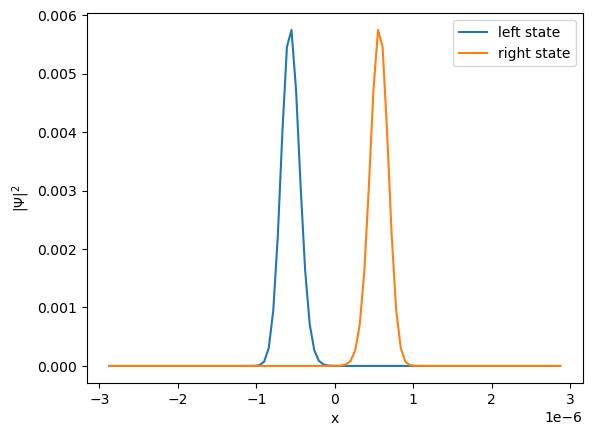

J = 0.444561 Hz
U_s = 19.981 Hz


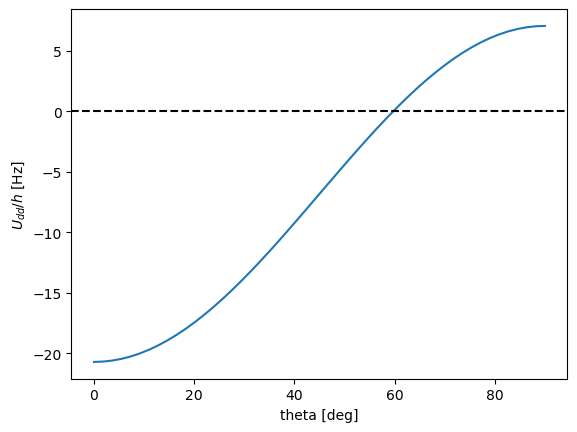

________________________________________________________________
d = 1.33um


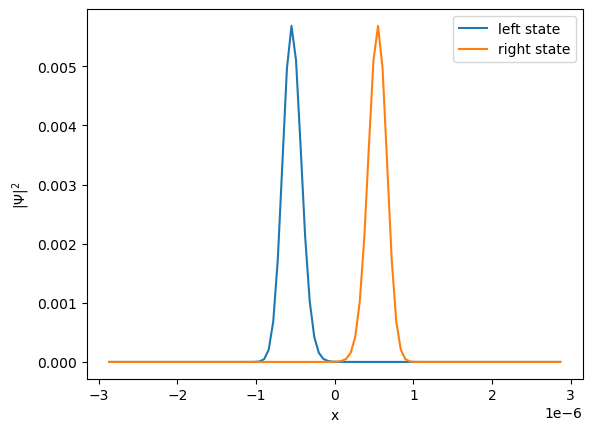

J = 1.051351 Hz
U_s = 19.591 Hz


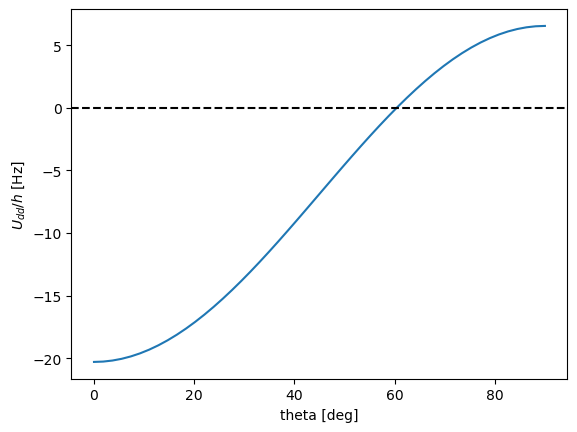

________________________________________________________________
d = 1.31um


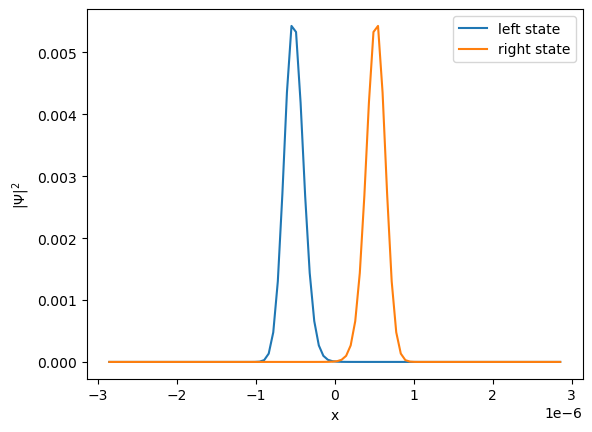

J = 2.448100 Hz
U_s = 19.135 Hz


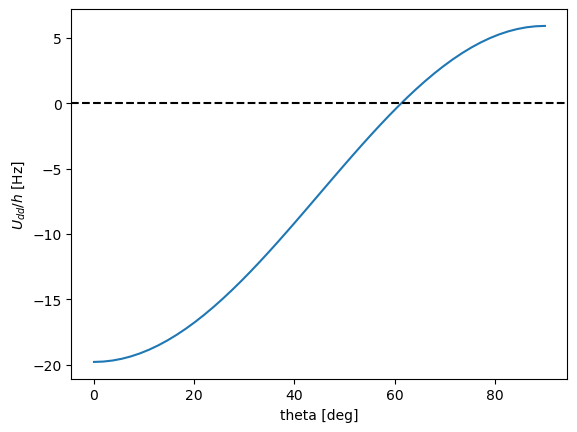

________________________________________________________________
d = 1.29um


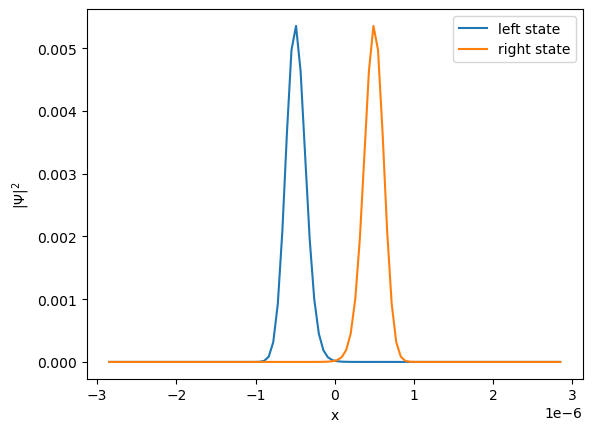

J = 5.575860 Hz
U_s = 18.593 Hz


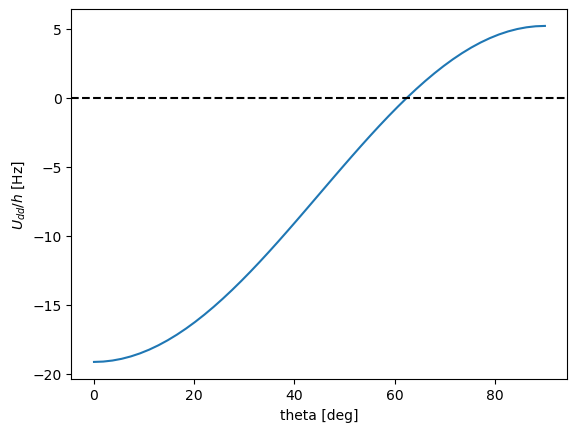

________________________________________________________________
d = 1.27um


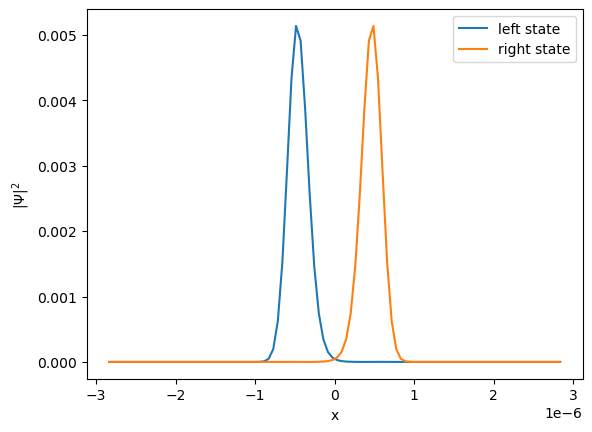

J = 12.302617 Hz
U_s = 17.930 Hz


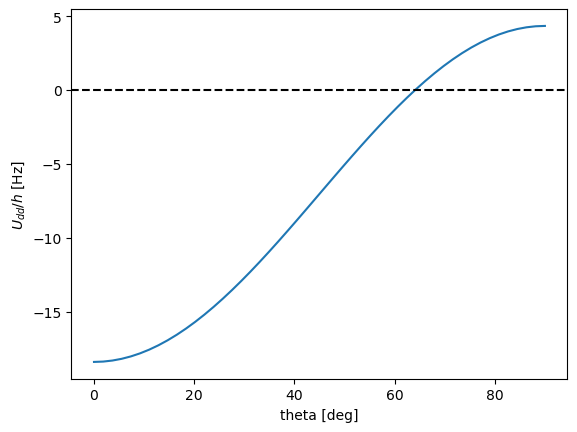

In [8]:
for i in range(10,15):

    trap, func_ham, res =  import_results(i)

    print("________________________________________________________________")
    print(f"d = {float(trap.subs(trap.distance_tweezers)) /si.um :.2f}um")

    GS_left, GS_right = get_localised_GS(res["states"][0], res["states"][1])
    
    plt.plot(res["x"],np.abs(GS_left[:,int(res["size"][1]/2),int(res["size"][2]/2)])**2, label="left state")
    plt.plot(res["x"],np.abs(GS_right[:,int(res["size"][1]/2),int(res["size"][2]/2)])**2, label="right state")

    plt.xlabel("x")
    plt.ylabel(r"$|\Psi|^2$")
    plt.legend()
    plt.show()

    J, U_s, U_dds, angles = analyse_diagonalisation(i)

    print(f"J = {J/const.h :3f} Hz")
    print(f"U_s = {U_s/const.h :.3f} Hz")

    plt.plot(np.rad2deg(angles), U_dds/const.h)

    plt.axhline(0,color="black",ls="--")

    plt.xlabel("theta [deg]")
    plt.ylabel(r"$U_{dd} / h$ [Hz]")
    plt.show()

-------------

In [5]:
trap, func_ham, res =  import_results(14)

GS_left, GS_right = get_localised_GS(res["states"][0], res["states"][1])

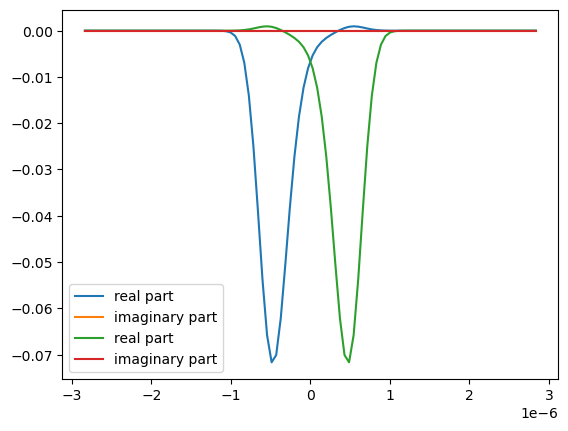

In [6]:

plt.plot(res["x"],(GS_left[:,int(res["size"][1]/2),int(res["size"][2]/2)]).real, label="real part")
plt.plot(res["x"],(GS_left[:,int(res["size"][1]/2),int(res["size"][2]/2)]).imag, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()

plt.plot(res["x"],(GS_right[:,int(res["size"][1]/2),int(res["size"][2]/2)]).real, label="real part")
plt.plot(res["x"],(GS_right[:,int(res["size"][1]/2),int(res["size"][2]/2)]).imag, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()
plt.show()

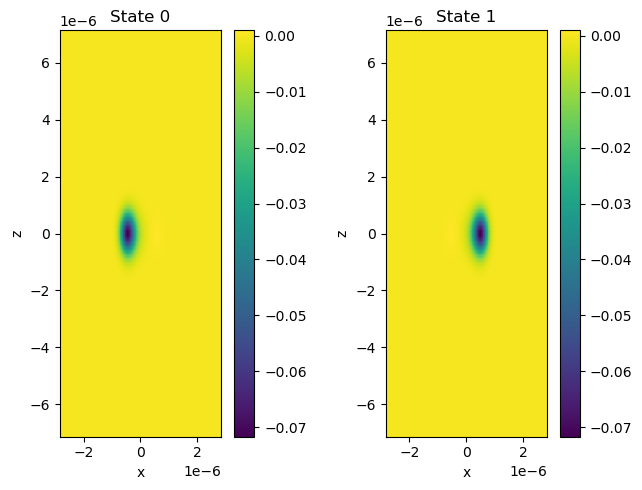

In [7]:
n_states = 2

states_plot = [GS_left.real, GS_right.real]
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(20/6*n_states, 5))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number][:, int(res["size"][1]/2), :].T,
                   extent=[*res["extend"][0], *res["extend"][2]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
